In [29]:
import os
import json
import sys
import matplotlib.pyplot as plt
from datetime import datetime
from tabulate import tabulate
import ipaddress

In [ ]:
!pip3 install tabulate
!pip3 install latextable
!pip3 install ipwhois

part 2

In [ ]:
from ipwhois import IPWhois
from pprint import pprint

name_networks = {}

def aggregate_ip_networks(file_name):
    # mappings = {}
    count = 0
    # name_networks = {}
    with open(file_name) as file:
        for ip in file:
            results = None
            try:
                ip = ip.strip()
                obj = IPWhois(ip)
                results = obj.lookup_rdap(rate_limit_timeout=10)
            except:
                print(f'error with ip {ip}, count = {count}')
                continue
            
            if results is None:
                continue

            cidr = results['network']['cidr']
            name = results['network']['name']

            if name not in name_networks.keys():
                name_networks[name] = set()

            name_networks[name].add(cidr)
            count += 1

            if count % 1000 == 0:
                with open(f'name_network_map_22_{int(count/1000)}.tmp', 'w') as name_file:
                    pprint(name_networks, name_file)
    
    with open('name_network_map_22', 'w') as name_file:
        pprint(name_networks, name_file)

    print(f'done running lookup for {count} ips')

def lookup_ranges(port_map):
    count = 0
    asn_map = {}
    asn_entity_map = {}
    for name, ranges in port_map.items():
        if name is 'None':
            continue

        ip = ranges[0]

        results = None
        try:
            ip = ip.strip()
            ip = ip.split('/')[0]
            obj = IPWhois(ip)
            results = obj.lookup_rdap(rate_limit_timeout=5)
        except:
            print(f'error with ip {ip}, count = {count}')
            continue

        asn_map[results['asn']] = ranges
        asn_entity_map[results['asn']] = results['entities']

        count += 1

    pprint(count)

    with open('asn_map', 'w') as name_file:
        pprint(asn_map, name_file)
    
    with open('asn_entity_map', 'w') as name_file:
        pprint(asn_entity_map, name_file)


if __name__ == '__main__':
    # aggregate_ip_networks('results.csv')
    lookup_ranges(port_80)

In [58]:
count = 0
with open('results22.csv') as file:
    count = 0
    for ip in file:
        count += 1

with open('results22.csv') as file:
    count = 0
    for ip in file:
        count += 1

4569

In [ ]:
with open('name_network_map.json', 'w') as fn:
    print(name_networks, file=fn)

with open('name_network_map_22.json', 'r') as file:
    new_map = json.loads(file.read())
    print(new_map)
    network_22 = new_map

In [ ]:
with open('asn_map', 'r') as file:
    new_map = json.loads(file.read())
    print(new_map)

In [ ]:
all_cidrs = set()

network_arr = {}

for k in network_80.keys():
    arr = []
    for cidr in network_80[k]:
        arr.append(cidr)
        all_cidrs.add(cidr)

    network_arr[k] = arr

In [ ]:
network_22 = set()

with open('results22.csv', 'r') as file:
    for line in file:
        network_22.add(line.strip())

len(network_22)

In [ ]:
port22_ips = {}
num_networks = 0
for name, cidr in network_22.items():
    for network in cidr:
        # ip_network = ipaddress.ip_network(network)
        networks = network.split(',')
        l = []
        for nw in networks:
            l.append(nw.strip())
            num_networks += 1
        port22_ips[name] = l

In [ ]:
num_networks

3071

In [ ]:
with open('port22_map', 'w') as file:
    file.write(json.dumps(port22_ips))

In [30]:
with open('port80_map', 'r') as file:
    network_80 = json.loads(file.read())

with open('port22_map', 'r') as file:
    network_22 = json.loads(file.read())

In [50]:
truncated_80 = {}
for name, cidrs in network_80.items():
    # if len(cidrs) not in truncated_80.keys():
        # truncated_80[len(cidrs)] = 0
    # truncated_80[len(cidrs)] += 1
    truncated_80[name] = len(cidrs)

# pprint(truncated_80)
table_80 = []
for k, v in sorted(truncated_80.items(), key= lambda item: item[1], reverse=True):
    if len(table_80) == 10:
        break
    table_80.append([k, v])

truncated_22 = {}
for name, cidrs in network_22.items():
    # if len(cidrs) not in truncated_22.keys():
    #     truncated_22[len(cidrs)] = 0
    # truncated_22[len(cidrs)] += 1
    truncated_22[name] = len(cidrs)

table_22 = []
for k, v in sorted(truncated_22.items(), key= lambda item: item[1], reverse=True):
    if len(table_22) == 10:
        break
    table_22.append([k, v])


In [52]:
truncated_80 = {}
for name, cidrs in network_80.items():
    truncated_80[name] = 0
    for cidr in cidrs:
        truncated_80[name] += ipaddress.IPv4Network(cidr).num_addresses

# pprint(truncated_80)
table_80 = []
for k, v in sorted(truncated_80.items(), key= lambda item: item[1], reverse=True):
    if len(table_80) == 10:
        break
    table_80.append([k, v])

truncated_22 = {}
for name, cidrs in network_22.items():
    truncated_22[name] = 0
    for cidr in cidrs:
        truncated_22[name] += ipaddress.IPv4Network(cidr).num_addresses

table_22 = []
for k, v in sorted(truncated_22.items(), key= lambda item: item[1], reverse=True):
    if len(table_22) == 10:
        break
    table_22.append([k, v])

In [59]:
print(tabulate(table_80, headers=['Owner name', 'Size of unprotected port 80 subnets'], tablefmt='latex'))

print(tabulate(table_22, headers=['Owner name', 'Size of unprotected port 22 subnets'], tablefmt='latex'))

\begin{tabular}{lr}
\hline
 Owner name        &   Size of unprotected port 80 subnets \\
\hline
 IANA-BLOCK        &                            4294967296 \\
 COGENT-A          &                              16777216 \\
 JPNIC-NET-JP-ERX  &                              16777216 \\
 APNIC-AP          &                              16777216 \\
 ORG-AFNC1-AFRINIC &                              16777216 \\
 CABLE-1           &                              16777216 \\
 ATT               &                              16777216 \\
 APPLE-WWNET       &                              16777216 \\
 NETBLK-CDPD-B     &                               8388608 \\
 CCCH3-4           &                               8388608 \\
\hline
\end{tabular}
\begin{tabular}{lr}
\hline
 Owner name       &   Size of unprotected port 22 subnets \\
\hline
 IANA-BLOCK       &                            4294967296 \\
 JPNIC-NET-JP-ERX &                              16777216 \\
 COGENT-A         &                           

In [55]:
count = 0
same_network = []

shared_network = set()

for cidrs in network_80.values():
    for ip_net in cidrs:
        shared_network.add(ip_net)

for cidrs in network_22.values():
    for ip_net in cidrs:
        if ip_net in shared_network:
            count += 1
        # shared_network.add(ip_net)

print(count)

390


In [66]:
print(network_80['AMAZON'])

print(network_22['ATT'])

['54.144.0.0/12', '54.160.0.0/11', '54.192.0.0/12', '54.208.0.0/13', '54.216.0.0/14', '54.220.0.0/15']
['12.0.0.0/8']


part 3

In [ ]:
def parse_pcap(file_name):
    transmission_stats = []
    with open(file_name, 'r') as file:
        for line in file:
            info = line.split()
            tcp_line = map_tcp_info(info)

            if 'from_site' not in tcp_line.keys() or 'flag' not in tcp_line.keys():
                continue

            transmission_stats.append(tcp_line)

    result_file = file_name.split('.')[0]
    with open(result_file + '_result.txt', 'w') as result_file:
        for i in transmission_stats:
            print(json.dumps(i), file=result_file)

    return transmission_stats

def map_tcp_info(info):
    tcp_map = {}
    prev_token = None
    for field in info:
        field = field.strip()

        if field[-1] == ':' or field[-1] == ',':
            field = field[:-1]

        if prev_token is None:
            tcp_map['timestamp'] = field
        elif prev_token == 'IP':
            tcp_map['src_ip'] = field
            if 'https' in field:
                tcp_map['from_site'] = True
        elif prev_token == '>':
            tcp_map['dst_ip'] = field.split(':')[0]
            if 'https' in field:
                tcp_map['from_site'] = False
        elif prev_token == 'Flags':
            tcp_map['flag'] = field
        elif prev_token == 'length':
            tcp_map['length'] = int(field)

        prev_token = field
    
    return tcp_map

def plot_info(file_name):
    stats = {'pkt_count': [], 'pkt_size': [], 'time': [], 'to_site': [], 'from_site': []}
    count = 0
    with open(file_name, 'r') as file:
        for json_obj in file:
            line = json.loads(json_obj)
            # time = line['timestamp'] #datetime.strptime(line['timestamp'], '%H:%M:%S.%f').timestamp()
            count += 1
            stats['pkt_count'].append(count)
            # stats['time'].append(time)
            stats['pkt_size'].append(line['length'])
            stats['to_site'].append(0 if line['from_site'] else 1)
            stats['from_site'].append(1 if line['from_site'] else 0)

    return stats


In [ ]:
folders = ['chrome', 'tor', 'vpn']

for folder in folders:

    file_list = os.listdir(folder)

    for file in file_list:
        if 'pcap' in file:
            continue

        ret = parse_pcap(os.path.join(folder, file))
        print(f'done {file}')

        # if 'result' in file:
        # plot_info(ret)

In [ ]:
all_data = {}
avg_data = {}

for folder in folders:
    file_list = os.listdir(folder)
    avg_data = {'avg_count': [], 'avg_size': [], 'site': []}
    for file_name in file_list:
        if 'result.txt' not in file_name:
            continue
        
        data = plot_info(os.path.join(folder, file_name))

        sum = 0
        count = 0
        for line in range(0, data['pkt_count'][-1]):
            # if data['to_site'][line] > 0:
            sum += data['pkt_size'][line]
            count += 1

            # if count > (data['pkt_count'][-1] / 10):
            #     avg_data['avg_size'].append(sum / count)
            #     avg_data['avg_count'].append(count)
            #     sum = 0
            #     count = 0

        avg_data['avg_size'].append(sum / count)
        avg_data['avg_count'].append(count / 10)
        avg_data['site'].append(file_name.split('_')[0])
    
    all_data[folder] = avg_data

In [ ]:
rotate_data = {}

for conn, data in all_data.items():
    rotate_data[conn] = []

    for i, site in enumerate(sorted(data['site'])):
        # site = data['site'][i]
        rotate_data[conn].append([site, data['avg_size'][i], data['avg_count'][i]])

    # rotate_data[conn] = dict(sorted(rotate_data[conn].items()))

rotate_data

In [ ]:
for conn, table in rotate_data.items():
    print(conn)
    print(tabulate(table, headers=['Site', 'Average packet size (bytes)', 'Average sent packet count'], tablefmt='latex'))

In [ ]:
chrome_data = all_data['chrome']
vpn_data = all_data['vpn']
tor_data = all_data['tor']

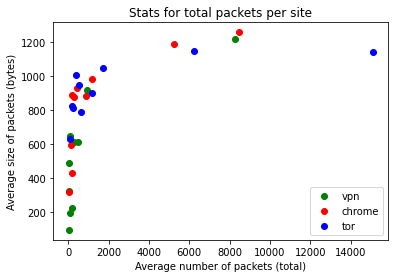

In [ ]:
plt.scatter('avg_count', 'avg_size', data=vpn_data, color='green', label='vpn')
plt.scatter('avg_count', 'avg_size', data=chrome_data, color='red', label='chrome')
plt.scatter('avg_count', 'avg_size', data=tor_data, color='blue', label='tor')

# for i, txt in enumerate(tor_data['site']):
    # print(i, txt)
    # plt.annotate(txt, (tor_data['avg_count'][i], tor_data['avg_size'][i]))

plt.legend()

plt.xlabel('Average number of packets (total)')
plt.ylabel('Average size of packets (bytes)')
plt.title('Stats for total packets per site')
# plt.show()
plt.savefig('full_plot_2')